In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tạo các đối tượng ImageDataGenerator để tiền xử lý dữ liệu
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# load dữ liệu huấn luyện và kiểm tra từ thư mục
train_generator = train_datagen.flow_from_directory(
        './data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        './data/validate',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.n // validation_generator.batch_size)

model.save('CNN.h5')

Found 3647 images belonging to 2 classes.
Found 454 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                     

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np

# load bức ảnh mới cần dự đoán
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# dự đoán lớp của bức ảnh
prediction = model.predict(img_tensor)
if prediction < 0.5:
    print("This is a cat!")
else:
    print("This is a dog!")

1/1 [==============================] - 0s 111ms/step
This is a dog!


1/1 [==============================] - 0s 22ms/step


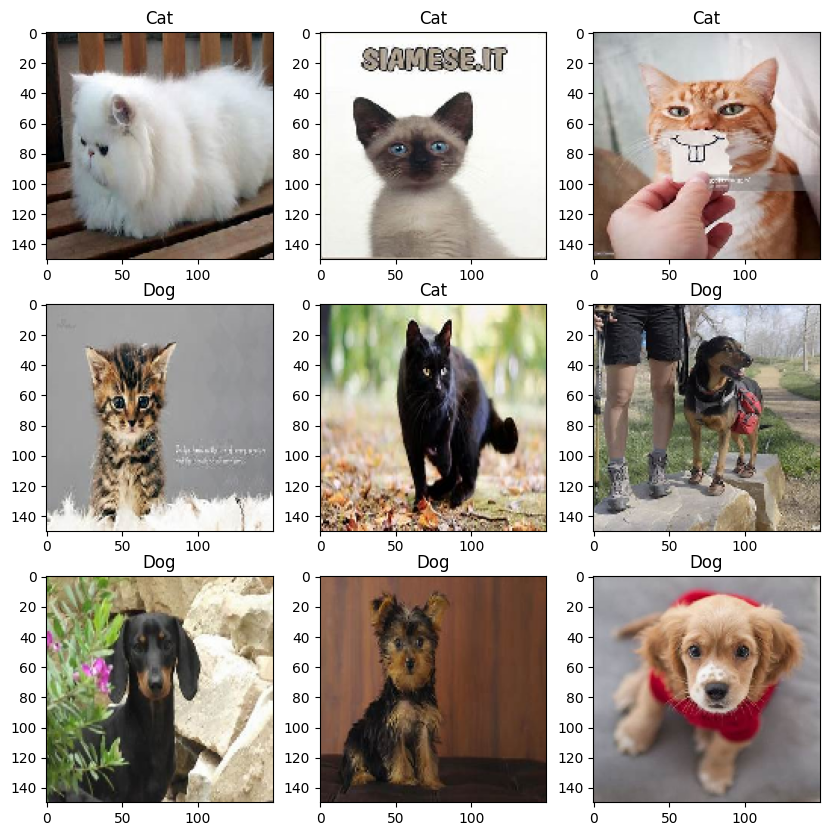

In [5]:
import os
from matplotlib import pyplot as plt
folder_path = 'data/ex/'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, f in enumerate(file_list[:9]):
    file_path = os.path.join(folder_path, f)
    img = image.load_img(file_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    prediction = model.predict(img_tensor)
    label =  "Cat" if prediction < 0.5 else "Dog"
    axs[i//3, i%3].imshow(img)
    axs[i//3, i%3].set_title(label)

plt.show()